In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dates = pd.date_range(start = "2020-01-01", end = "2020-10-31", freq = "D")

In [30]:
np.random.seed(123)
visitatori = np.random.normal(1200,900,size = len(dates))
visitatori = visitatori.astype(int)

In [31]:
trend = np.linspace(1000,0,len(dates),dtype="int")
visitatori_meno_trend = visitatori + trend
visitatori_meno_trend = np.maximum(visitatori_meno_trend, 0)

In [32]:
## 2 ##

df = pd.DataFrame({"Giorno": dates, "Visitatori" : visitatori_meno_trend})
df.set_index("Giorno", inplace = True)
patologie = ["cuore", "ossa", "testa"]
df["Patologie"] = np.random.choice(patologie, size=len(df))
df.head()

,Visitatori,Patologie
Giorno,,
2020-01-01,1222,ossa
2020-01-02,3093,cuore
2020-01-03,2447,testa
2020-01-04,835,testa
2020-01-05,1665,testa


In [44]:
dates.month.unique()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int32')

In [34]:
## 3 ## mean
for i in set(dates.month):
    mean_month = df["Visitatori"][dates.month == i].mean()
    print(round(mean_month,2))

2181.39
2205.31
1917.0
1771.37
1970.65
1617.3
1487.81
1267.58
1455.07
1010.16


In [35]:
## 3 ##  std
for i in set(dates.month):
    std_month = df["Visitatori"][dates.month == i].std()
    print(round(std_month,2))

1050.42
1079.28
959.13
1040.21
700.53
761.63
694.07
743.55
926.26
859.63


In [36]:
## 3 ##  patologie
conta_patologie = df["Patologie"].value_counts()
patologia_piu_comune = conta_patologie.idxmax()
patologia_meno_comune = conta_patologie.idxmin()

print(f"La patologia più comune è: {patologia_piu_comune} con {conta_patologie[patologia_piu_comune]}")
print(f"La patologia meno comune è: {patologia_meno_comune} con {conta_patologie[patologia_meno_comune]}")

La patologia più comune è: ossa con 113
La patologia meno comune è: cuore con 94


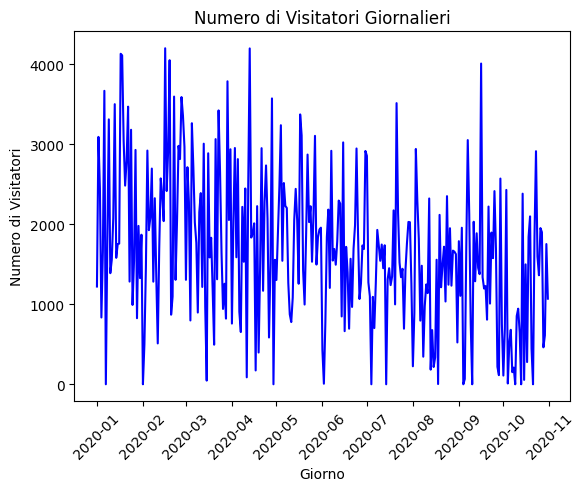

In [41]:
## 4.1 ## grafico a linee
plt.figure()
plt.plot(df.index, df["Visitatori"], linestyle='-', color='b', label='Visitatori giornalieri')
plt.title('Numero di Visitatori Giornalieri')
plt.xlabel('Giorno')
plt.ylabel('Numero di Visitatori')
plt.xticks(rotation=45)
plt.show()

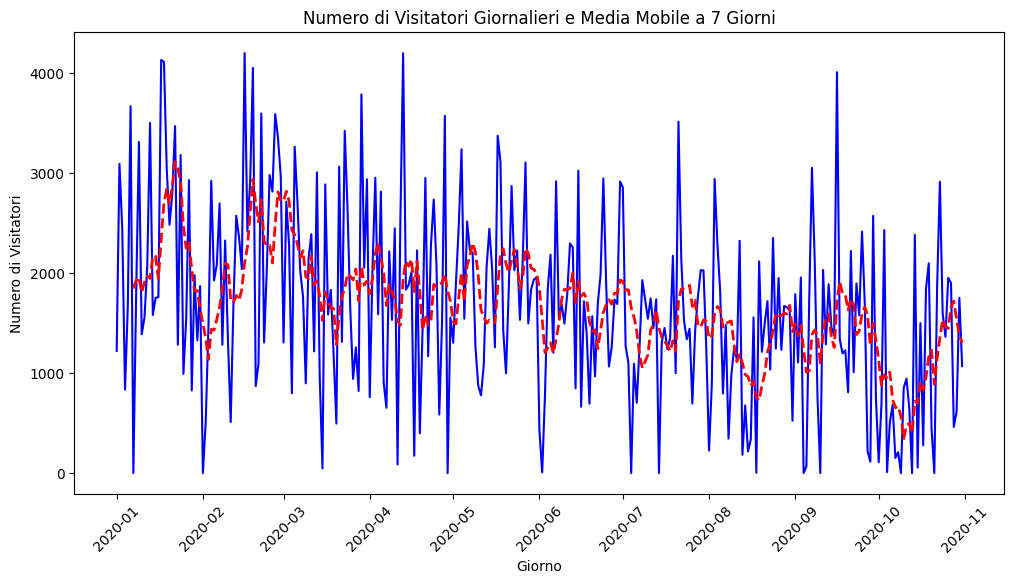

In [42]:
## 4.2 ## media mobile
# media mobile a 7 giorni
df["Media Mobile 7 Giorni"] = df["Visitatori"].rolling(window=7).mean()

# grafico a linee
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Visitatori"], linestyle='-', color='b', label='Visitatori giornalieri')
plt.plot(df.index, df["Media Mobile 7 Giorni"], color='r', linestyle='--', linewidth=2, label='Media Mobile a 7 Giorni')

plt.title('Numero di Visitatori Giornalieri e Media Mobile a 7 Giorni')
plt.xlabel('Giorno')
plt.ylabel('Numero di Visitatori')
plt.xticks(rotation=45)

plt.show()

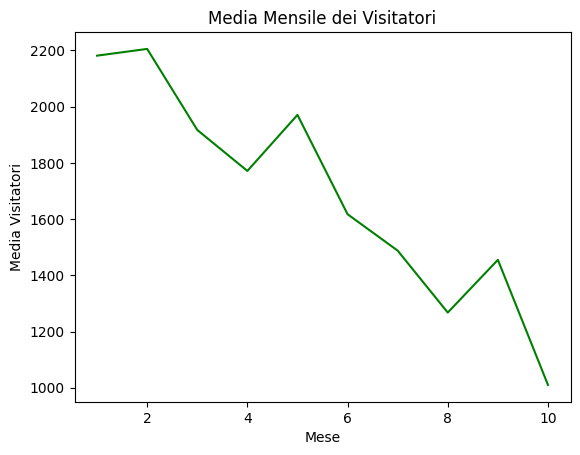

In [51]:
## 4.3 ## media mensile
plt.figure()

media_mensile = [df["Visitatori"][dates.month == i].mean() for i in set(dates.month)]

plt.plot(dates.month.unique(),media_mensile , linestyle='-', color='g', label='Media Mensile dei Visitatori')
plt.title('Media Mensile dei Visitatori')
plt.xlabel('Mese')
plt.ylabel('Media Visitatori')
plt.show()

([<matplotlib.patches.Wedge at 0x18d5236a7e0>,
 [Text(0.4353023660501959, 1.0102038656187677, 'ossa'),
  Text(-1.079001744169839, -0.2139047359888173, 'testa'),
  Text(0.623435792446873, -0.9062713791663839, 'cuore')],
 [Text(0.23743765420919774, 0.5510202903375097, '37.0%'),
  Text(-0.5885464059108212, -0.11667531053935487, '32.1%'),
  Text(0.3400558867892034, -0.4943298431816639, '30.8%')])

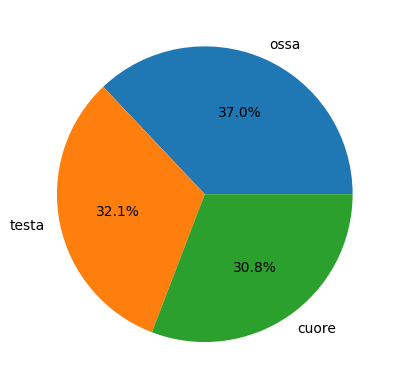

In [52]:
##4.4##  Creare un grafico che mostri la divisione fra le 3 patologie
plt.figure()
plt.pie(conta_patologie, labels=conta_patologie.index, autopct='%1.1f%%')